# Disaggregated Results
Model similarity and recourse among subgroups

In [1]:
#%%
%load_ext autoreload
%autoreload 2

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import torch
import pandas as pd
from functools import partial
import logging

from mono_multi.setup import (
    PAPER_TASKS,
    FIGURES_ROOT_DIR,
)

from mono_multi.utils import (
    load_model_outputs_same_prompt,
    load_results_overview,
    add_evals_to_df,
    load_data_if_needed,
    filter_results_all_tasks,
    create_df_family_dev,
)

from mono_multi.plotting import (
    plot_for_groups_all_tasks,

PAPER_TASKS_wo_Mobility = [t for t in PAPER_TASKS if t != "ACSMobility"]

/Users/mgorecki/opt/miniconda3/envs/monoc-py311/lib/python3.11/site-packages/xport/__about__.py:18: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


In [ ]:
plot_config_file = "./results/.matplotlibrc"
plt.rcParams.update(mpl.rc_params_from_file(fname=plot_config_file))

FIGURES_PAPER_DIR = FIGURES_ROOT_DIR / "same-prompt"
TASKS = PAPER_TASKS
print("tasks", TASKS)

tasks ('ACSIncome', 'ACSEmployment', 'BRFSS_Blood_Pressure', 'SIPP', 'ACSTravelTime', 'ACSPublicCoverage', 'ACSMobility')


In [4]:
select_by = "accuracy"  #'balanced_accuracy' #
fit_threshold_for = "balanced_accuracy"  #'accuracy' #

In [5]:
bootstrap = True
fig_height = 0.9

## Load Task Data

In [6]:
try:
    data_all
except NameError:
    print("'data_all' not yet defined")
    data_all = load_data_if_needed(data=None, tasks=TASKS)
else:
    print("Already defined, update if needed.")
    data_all = load_data_if_needed(data=data_all, tasks=TASKS)

'data_all' not yet defined
ACSIncome
ACSEmployment


BRFSS_Blood_Pressure
SIPP
ACSTravelTime
ACSPublicCoverage
ACSMobility


## Load predictions

In [7]:
num_shots = 0
threshold_fitted = True

df = load_results_overview(
    num_shots=num_shots, threshold_fitted=threshold_fitted, same_prompt=True
)
df = df[df["task"].isin(TASKS)]
df = df[df["correct_order_bias"] == 0]
if threshold_fitted and ("threshold_obj" in df.columns):
    df = df[df["threshold_obj"] == fit_threshold_for]

df["predictions_path"] = "/Volumes/mgorecki/monoculture/" + df["predictions_path"]

df.shape

(349, 19)

In [8]:
try:
    assert set(TASKS).issubset(
        set(df["task"].unique())
    ), f"Results for all tasks to be analysed have to be available, available are: {list(df['task'].unique())} "
except AssertionError:
    TASKS = list(df["task"].unique())
    logging.warning(f"Reduced TASKS to available tasks: {TASKS}")

In [9]:
predictions_all = load_model_outputs_same_prompt(
    df, tasks=TASKS, return_risk_scores=False
)

df = add_evals_to_df(df)

ACSIncome
ACSEmployment
BRFSS_Blood_Pressure
SIPP
ACSTravelTime
ACSPublicCoverage
ACSMobility


In [10]:
restrict_to_better_const = False
restrict_to_positive_label = True
restrict_to_negative_label = False
restrict_to_top_eps = True
eps = 0.05
restrict_to_topk = False
topk = 10

predictions, data = filter_results_all_tasks(
    predictions=predictions_all.copy(),
    df=df,
    data=data_all.copy(),  # {t: val for t, val in data_all.items() if t in TASKS},
    tasks=TASKS,
    restrict_to_better_const=restrict_to_better_const,
    restrict_to_positive_label=restrict_to_positive_label,
    restrict_to_negative_label=restrict_to_negative_label,
    restrict_to_top_eps=restrict_to_top_eps,
    restrict_to_topk=restrict_to_topk,
    eps=eps,
    topk=topk,
    acc=select_by,
)

ACSIncome
- before: (166450, 50)
- after: (61233, 27)
ACSEmployment
- before: (323611, 50)
- after: (146740, 8)
BRFSS_Blood_Pressure
- before: (84676, 50)
- after: (44586, 23)
SIPP
- before: (3972, 49)
- after: (2035, 16)
ACSTravelTime
- before: (146665, 50)
- after: (64285, 12)
ACSPublicCoverage
- before: (113829, 50)
- after: (33971, 21)
ACSMobility
- before: (62094, 50)
- after: (16446, 5)


## Helper Functions

In [11]:
# helpers
def build_filename(name: str):
    parts = [
        f"{name}-{num_shots}-shot",
        (
            f"_selected_by-{select_by.replace('_','-')}"
            f"_tresh_fitted-{fit_threshold_for.replace('_','-')}"
            if threshold_fitted
            else ""
        ),
        "_better_const" if restrict_to_better_const else "",
        "_pos_instances" if restrict_to_positive_label else "",
        "_neg_instances" if restrict_to_negative_label else "",
        f"_eps{str(eps).replace('.', '_')}" if restrict_to_top_eps else "",
        f"_top{topk}" if restrict_to_topk else "",
        "_bootstrapped" if bootstrap else "",
    ]
    return "".join(parts)

In [12]:
all_models = False
if all_models:
    preds = predictions_all
    dat = data_all
else:
    preds = predictions
    dat = data

## Recourse depends on the model set size

In [13]:
colors = [
    "#1b9e77",
    "#d95f02",
    "#7570b3",
    "#e7298a",
    "#66a61e",
    "#e6ab02",
    "#a6761d",
    "#666666",
]

1 models
(n, k)=(27, 1)=27
(n, k)=(27, 1)=27
(n, k)=(27, 1)=27
2 models
(n, k)=(27, 2)=351
(n, k)=(27, 2)=351
(n, k)=(27, 2)=351
4 models
(n, k)=(27, 4)=17550
(n, k)=(27, 4)=17550
(n, k)=(27, 4)=17550
6 models
(n, k)=(27, 6)=296010
(n, k)=(27, 6)=296010
(n, k)=(27, 6)=296010
8 models
(n, k)=(27, 8)=2220075
(n, k)=(27, 8)=2220075
(n, k)=(27, 8)=2220075
10 models
(n, k)=(27, 10)=8436285
(n, k)=(27, 10)=8436285
(n, k)=(27, 10)=8436285
20 models
(n, k)=(27, 20)=888030
(n, k)=(27, 20)=888030
(n, k)=(27, 20)=888030
27 models
(n, k)=(27, 27)=1
(n, k)=(27, 27)=1
(n, k)=(27, 27)=1


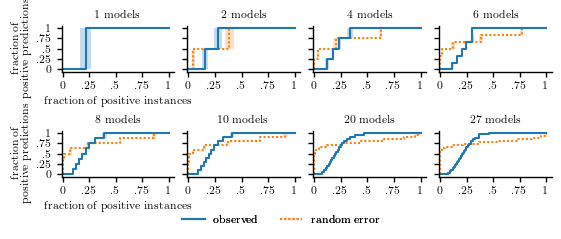

In [ ]:
from monoculture.plotting import plot_recourse_wrapper, unique_legend_items
import numpy as np
from monoculture.utils import no_leading_0
from matplotlib.ticker import FuncFormatter

file_name = FIGURES_PAPER_DIR / build_filename("recourse-num-models")


num_models = [1, 2, 4, 6, 8, 10, 20, 27]
nrows, ncols = 2,len(num_models)//2
fig, axs = plt.subplots(
    nrows, ncols,
    constrained_layout=True,
    figsize=(plt.rcParams["figure.figsize"][0], 0.7*plt.rcParams["figure.figsize"][1]),
    sharey="row",
)

fraction_no_reocurse_obs = []
fraction_no_reocurse_at_random = []
for i, ax in enumerate(axs.flat):
    print(f"{num_models[i]} models")
    ax, recourse_obs, recourse_at_random = plot_recourse_wrapper(
        ax=ax,
        predictions=preds["ACSIncome"],
        df=df[df["task"] == "ACSIncome"],
        xlabel="",
        ylabel="",
        plot_monoc=False,
        # obs_color=colors[i],
        obs_label=num_models[i],
        # baseline_color=colors[i],
        baseline_linestyle=(0, (1, 1)),  # densely dotted
        bootstrap=True,
        axis=1,
        num_samples=num_models[i],
        num_resamples=10000,
        plot_pdf=False,
        plot_baseline=(
            num_models[i] > 1
        ),  # if 1, baseline = observed (TPR is computed from observed predictions)
    )
    frac_ind_obs, frac_models_obs = recourse_obs[:, 0], recourse_obs[:, 1]
    frac_ind_at_random, frac_models_at_random = recourse_at_random[:, 0], recourse_at_random[:, 1]
    fraction_no_reocurse_obs.append(frac_ind_obs[frac_models_obs == 0])
    fraction_no_reocurse_at_random.append(frac_ind_at_random[frac_models_at_random == 0])

    ax.set_title(f"{num_models[i]} models")
    ax.set_xticks(np.linspace(0, 1.0, num=5))
    ax.set_xlim(-0.01, 1.05)
    formatter = no_leading_0() # remove leading 0
    ax.xaxis.set_major_formatter(formatter)

labels, handles = zip(*unique_legend_items(axs).items())
if nrows > 1: 
    for r in range(nrows):
        axs[r, 0].set_ylabel("fraction of\n positive predictions")
        axs[r, 0].set_xlabel("fraction of positive instances")
        fig.legend(handles[:2], ['observed', 'random error'], loc='lower center', bbox_to_anchor=(0.5, -0.09), ncol=2)
else: 
    axs[0].set_ylabel("fraction of\n positive predictions")
    axs[0].set_xlabel("fraction of positive instances")
    axs[-1].legend(handles[:2], ['observed', 'random error'])

for ending in [".svg", ".pdf"]:
    assert file_name.parent.exists()
    plt.savefig(f"{file_name.as_posix()}{ending}")

plt.show()

In [ ]:
# from monoculture.plotting import (
#     compute_curves_for_recourse_lineplot,
#     configure_legend,
#     unique_legend_items,
# )

# num_models = [1,2,4,6,8,10,12,14,16,18,20,22,24,26,27]


# mask = (df["model"].isin(preds["ACSIncome"].columns)) & (df["task"] == "ACSIncome")
# # TPR
# baseline_rates = 1.0 - df[mask]["fnr"].values


# def make_data_dict(num_models):
#     return {
#         key: {
#             "fraction": np.empty(shape=(num_models,)),
#             "std_err": np.empty(shape=(num_models,)),
#         }
#         for key in ["obs", "baseline"]
#     }


# no_recourse = make_data_dict(len(num_models))
# full_recourse = make_data_dict(len(num_models))
# limited_recourse = make_data_dict(len(num_models))
# substantial_recourse = make_data_dict(len(num_models))

# for i, num in enumerate(num_models):
#     curves = compute_curves_for_recourse_lineplot(
#         predictions=preds["ACSIncome"].values,
#         baseline_rates=baseline_rates,
#         count_accepted=True,
#         at_least=False,
#         bootstrap=True,
#         axis=1,
#         num_samples=num,
#         num_resamples=10000,
#     )
#     for d, indicator_fun in [
#         (no_recourse, lambda x: x == 0),
#         (full_recourse, lambda x: x == 1),
#         (limited_recourse, lambda x: x <= 0.5),
#         (substantial_recourse, lambda x: x > 0.5),
#     ]:
#         d["obs"]["fraction"][i] = (
#             curves["observed"]
#             .fraction_individuals[indicator_fun(curves["observed"].fraction_models)]
#             .sum()
#         )
#         d["obs"]["std_err"][i] = (
#             curves["observed"]
#             .fill_between[indicator_fun(curves["observed"].fraction_models)]
#             .sum()
#         )
#         d["baseline"]["fraction"][i] = (
#             curves["baseline"]
#             .fraction_individuals[indicator_fun(curves["baseline"].fraction_models)]
#             .sum()
#         )
#         d["baseline"]["std_err"][i] = (
#             curves["baseline"]
#             .fill_between[indicator_fun(curves["baseline"].fraction_models)]
#             .sum()
#         )

In [16]:
# file_name = FIGURES_PAPER_DIR / build_filename("recourse-level-num-models")
# fig, axs = plt.subplots(
#     1, 2,
#     constrained_layout=True,
#     figsize=(plt.rcParams["figure.figsize"][0], 0.4*plt.rcParams["figure.figsize"][1]),
#     # sharey=True, #"row",
# )
# for i, ax in enumerate(axs.flat):
#     if i == 0:
#         res = no_recourse
#         level = "no recourse"
#         ax.set_ylabel(f"fraction of individuals")
#     # elif i == 1: 
#     #     res = limited_recourse
#     #     level = "limited recourse"
#     # elif i == 2: 
#     #     res = substantial_recourse
#     #     level = "substantial recourse"   
#     elif i == 1: 
#         res = full_recourse
#         level = "full recourse"
#     ax.errorbar(x=num_models, y=res["baseline"]["fraction"], yerr=res["baseline"]["std_err"], color='C1', label="random error")
#     ax.errorbar(x=num_models, y=res["obs"]["fraction"], yerr=res["obs"]["std_err"], color='C0', label="observed")
#     axs[0].set_xlabel("number of models")
#     ax.set_title(f'{level}')

# labels, handles = zip(*unique_legend_items(axs).items())
# axs[0].legend(handles, labels)

# # for ending in [".png", ".pdf"]:
# #     assert file_name.parent.exists()
# #     plt.savefig(f"{file_name.as_posix()}{ending}")
# plt.show()

## Model Families

#### Groups

In [17]:
colors = [
    "#1b9e77",
    "#d95f02",
    "#7570b3",
    "#e7298a",
    "#66a61e",
    "#e6ab02",
    "#a6761d",
    "#666666",
]

family_dev_df = create_df_family_dev()
models_grouped = family_dev_df.groupby("developer")["model"].apply(list).to_dict()
family_dev_df.head()

model_family_map = {}
for task in PAPER_TASKS:
    filtered_models_grouped = {
        group: [m for m in models if m in preds[task].columns]
        for group, models in models_grouped.items()
        if any(m in preds[task].columns for m in models)
    }
    model_family_map[task] = {"feature": "model", "values": filtered_models_grouped}
# model_family_map['ACSEmployment']

#### Agreement


ACSIncome          61233 individuals 
- 0 01.AI                                    2 model(s) - skipping
- 1 Alibaba                                  7 models
- 2 AllenAI                                  1 model(s) - skipping
- 3 Google                                   1 model(s) - skipping
- 4 Meta                                     8 models
- 5 Mistral AI                               7 models
- 6 OpenAI                                   1 model(s) - skipping
all: mean agreement: 0.8837, mean agreement at random: 0.6366
Alibaba: mean agreement: 0.8936, mean agreement at random: 0.6378
Meta: mean agreement: 0.8801, mean agreement at random: 0.6392
Mistral AI: mean agreement: 0.8803, mean agreement at random: 0.6354

BRFSS_Blood_Pressure    44586 individuals 
- 0 01.AI                                    3 model(s) - skipping
- 1 Alibaba                                  5 models
- 2 AllenAI                                  -
- 3 Google                                   2 model(s) - s

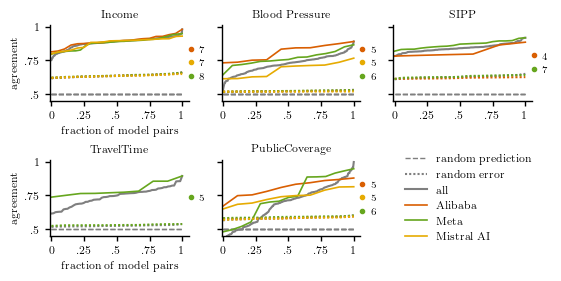

In [18]:
file_name = FIGURES_PAPER_DIR / build_filename("model-families-agreement")
plot_for_groups_all_tasks(
    what_to_plot="agreement",
    tasks=[t for t in PAPER_TASKS_wo_Mobility if t != "ACSEmployment"],
    predictions=preds,
    data=dat,
    df=df,
    group_map=model_family_map,
    colors=colors,
    ylabel="agreement",
    xlabel="fraction of model pairs",
    legend_yoffset=0.25,
    file_name=file_name,
    fig_width=plt.rcParams["figure.figsize"][0],
    fig_height=fig_height*plt.rcParams["figure.figsize"][1],
    min_group_size=4,
    legend_ncol=3,
    bootstrap=False,
    axis=1,
    num_resamples=1000,
    place_legend_in_ax=True, 
    legend_loc='center left'
)

#### Recourse


ACSIncome          61233 individuals 
- 0 01.AI                                    2 model(s) - skipping
- 1 Alibaba                                  7 models
- 2 AllenAI                                  1 model(s) - skipping
- 3 Google                                   1 model(s) - skipping
- 4 Meta                                     8 models
- 5 Mistral AI                               7 models
- 6 OpenAI                                   1 model(s) - skipping
(n, k)=(27, 7)=888030
(n, k)=(27, 7)=888030
(n, k)=(27, 7)=888030
(n, k)=(7, 7)=1
(n, k)=(7, 7)=1
(n, k)=(7, 7)=1
(n, k)=(8, 7)=8
(n, k)=(8, 7)=8
(n, k)=(8, 7)=8
(n, k)=(7, 7)=1
(n, k)=(7, 7)=1
(n, k)=(7, 7)=1

BRFSS_Blood_Pressure    44586 individuals 
- 0 01.AI                                    3 model(s) - skipping
- 1 Alibaba                                  5 models
- 2 AllenAI                                  -
- 3 Google                                   2 model(s) - skipping
- 4 Meta                                  

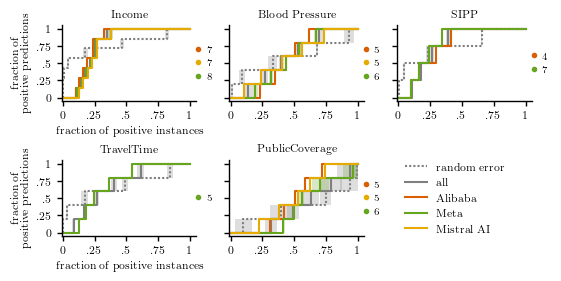

In [19]:
file_name = FIGURES_PAPER_DIR / build_filename("model-families-recourse")
plot_for_groups_all_tasks(
    what_to_plot="recourse",
    tasks=[t for t in PAPER_TASKS_wo_Mobility if t != "ACSEmployment"],
    predictions=preds,
    data=dat,
    df=df,
    group_map=model_family_map,
    colors=colors,
    ylabel="fraction of\n positive predictions",
    xlabel="fraction of positive instances",
    legend_yoffset=0.2,
    file_name=file_name,
    fig_width=plt.rcParams["figure.figsize"][0],
    fig_height=fig_height*plt.rcParams["figure.figsize"][1],
    bootstrap=bootstrap,
    axis=1,
    min_group_size=4,
    legend_ncol=5,
    num_resamples=1000,
    place_legend_in_ax=True, 
    legend_loc='center left'
)

## Base vs Instruction-Tuned

In [20]:
colors = ["#56B4E9", "#D55E00"]

base_it_map = {}
for task in PAPER_TASKS:
    models_grouped = (
        df[df["task"] == task].groupby("is_inst")["model"].apply(list).to_dict()
    )
    key_map = {0: "base", 1: "instruct"}
    models_grouped = {key_map[k]: v for k, v in models_grouped.items()}
    base_it_map[task] = {"feature": "model", "values": models_grouped}
base_it_map["ACSMobility"]

{'feature': 'model',
 'values': {'base': ['allenai--OLMo-7B-hf',
   'meta-llama--Meta-Llama-3.1-8B',
   'Qwen--Qwen2-7B',
   'google--gemma-2b',
   'gpt-3.5-turbo-0125',
   'mistralai--Mixtral-8x22B-v0.1',
   'meta-llama--Meta-Llama-3.2-3B',
   'allenai--OLMo-1B-hf',
   'Qwen--Qwen2.5-7B',
   'google--gemma-2-9b',
   'meta-llama--Meta-Llama-3.2-1B',
   'Qwen--Qwen2-72B',
   'google--gemma-2-27b',
   'allenai--OLMo-2-1124-7B',
   'allenai--OLMo-1B-0724-hf',
   'meta-llama--Meta-Llama-3.1-70B',
   'meta-llama--Meta-Llama-3-70B',
   'google--gemma-7b',
   'meta-llama--Meta-Llama-3-8B',
   'Qwen--Qwen2.5-72B',
   'mistralai--Mistral-7B-v0.1',
   'mistralai--Mistral-Small-24B-Base-2501',
   'gpt-4.1',
   'mistralai--Mixtral-8x7B-v0.1',
   'allenai--OLMo-7B-0724-hf',
   '01-ai--Yi-6B',
   '01-ai--Yi-34B'],
  'instruct': ['google--gemma-2-27b-it',
   'meta-llama--Meta-Llama-3.2-3B-Instruct',
   'Qwen--Qwen2-7B-Instruct',
   'mistralai--Mixtral-8x22B-Instruct-v0.1',
   'meta-llama--Meta-Llama-

##### Agreement


ACSIncome          61233 individuals 
- 0 base                                     12 models
- 1 instruct                                 15 models
(n, k)=(27, 12)=17383860
(n, k)=(27, 12)=17383860
all: mean agreement: 0.8840, mean agreement at random: 0.6367
(n, k)=(12, 12)=1
(n, k)=(12, 12)=1
base: mean agreement: 0.8616, mean agreement at random: 0.6338
(n, k)=(15, 12)=455
(n, k)=(15, 12)=455
instruct: mean agreement: 0.9029, mean agreement at random: 0.6388

ACSEmployment     146740 individuals 
- 0 base                                     4 models
- 1 instruct                                 4 models
(n, k)=(8, 4)=70
(n, k)=(8, 4)=70
all: mean agreement: 0.8829, mean agreement at random: 0.6639
(n, k)=(4, 4)=1
(n, k)=(4, 4)=1
base: mean agreement: 0.8653, mean agreement at random: 0.6588
(n, k)=(4, 4)=1
(n, k)=(4, 4)=1
instruct: mean agreement: 0.9074, mean agreement at random: 0.6690

BRFSS_Blood_Pressure    44586 individuals 
- 0 base                                     8 model

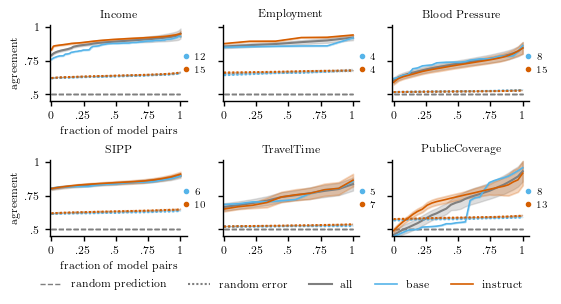

In [21]:
file_name = FIGURES_PAPER_DIR / build_filename("base-it-agreement")
plot_for_groups_all_tasks(
    what_to_plot="agreement",
    tasks=PAPER_TASKS_wo_Mobility,
    predictions=preds,
    data=dat,
    df=df,
    group_map=base_it_map,
    colors=colors,
    ylabel="agreement",
    xlabel="fraction of model pairs",
    legend_yoffset=0.2,
    file_name=file_name,
    fig_width=plt.rcParams["figure.figsize"][0],
    fig_height=fig_height*plt.rcParams["figure.figsize"][1],
    bootstrap=bootstrap,
    axis=1,
    legend_ncol=5,
)

##### Recourse


ACSIncome          61233 individuals 
- 0 base                                     12 models
- 1 instruct                                 15 models
(n, k)=(27, 12)=17383860
(n, k)=(27, 12)=17383860
(n, k)=(27, 12)=17383860
(n, k)=(12, 12)=1
(n, k)=(12, 12)=1
(n, k)=(12, 12)=1
(n, k)=(15, 12)=455
(n, k)=(15, 12)=455
(n, k)=(15, 12)=455

ACSEmployment     146740 individuals 
- 0 base                                     4 models
- 1 instruct                                 4 models
(n, k)=(8, 4)=70
(n, k)=(8, 4)=70
(n, k)=(8, 4)=70
(n, k)=(4, 4)=1
(n, k)=(4, 4)=1
(n, k)=(4, 4)=1
(n, k)=(4, 4)=1
(n, k)=(4, 4)=1
(n, k)=(4, 4)=1

BRFSS_Blood_Pressure    44586 individuals 
- 0 base                                     8 models
- 1 instruct                                 15 models
(n, k)=(23, 8)=490314
(n, k)=(23, 8)=490314
(n, k)=(23, 8)=490314
(n, k)=(8, 8)=1
(n, k)=(8, 8)=1
(n, k)=(8, 8)=1
(n, k)=(15, 8)=6435
(n, k)=(15, 8)=6435
(n, k)=(15, 8)=6435

SIPP                2035 individuals 
- 

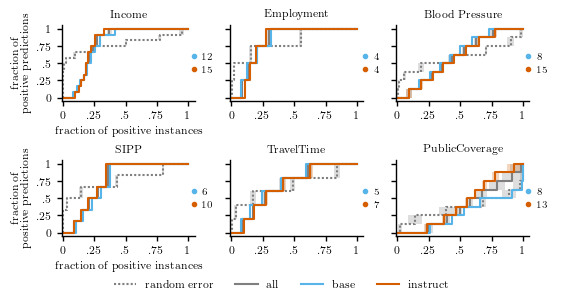

In [22]:
file_name = FIGURES_PAPER_DIR / build_filename("base-it-recourse")
plot_for_groups_all_tasks(
    what_to_plot="recourse",
    tasks=PAPER_TASKS_wo_Mobility,
    predictions=preds,
    data=dat,
    df=df,
    group_map=base_it_map,
    colors=colors,
    ylabel="fraction of\n positive predictions",
    xlabel="fraction of positive instances",
    legend_yoffset=0.2,
    file_name=file_name,
    fig_width=plt.rcParams["figure.figsize"][0],
    fig_height=fig_height*plt.rcParams["figure.figsize"][1],
    bootstrap=bootstrap,
    axis=1,
    legend_ncol=4,
)

## Demographic Groups

In [23]:
bootstrap = False

In [24]:
colors = ["#56B4E9", "#D55E00"]  # ["#1b9e77", "#d95f02",] #

#### Separate by Gender

##### Unified mapping

In [25]:
from folktexts.acs.acs_columns import acs_sex
from folktexts.ts.brfss_columns import tableshift_sex
from folktexts.sipp.sipp_columns import sipp_gender

sex_map = {}
for task in PAPER_TASKS:

    if task.startswith("ACS"):
        sex_map[task] = {
            "feature": "SEX",
            "values": {
                acs_sex.value_map(val): val for val in data_all[task][0]["SEX"].unique()
            },
        }
    elif task.startswith("BRFSS"):
        sex_map[task] = {
            "feature": "SEX",
            "values": {
                tableshift_sex.value_map(val): val
                for val in data_all[task][0]["SEX"].unique()
            },
        }
    elif task.startswith("SIPP"):
        sex_map[task] = {
            "feature": "GENDER",
            "values": {
                sipp_gender.value_map(val): val
                for val in data_all[task][0]["GENDER"].unique()
            },
        }
# sex_map

##### Agreement


ACSIncome          61233 individuals 
- 0 Female                                      23091 individuals (0.38)
- 1 Male                                        38142 individuals (0.62)
all: mean agreement: 0.8837, mean agreement at random: 0.6366
Female: mean agreement: 0.8862, mean agreement at random: 0.6366
Male: mean agreement: 0.8821, mean agreement at random: 0.6366

ACSEmployment     146740 individuals 
- 0 Female                                      70469 individuals (0.48)
- 1 Male                                        76271 individuals (0.52)
all: mean agreement: 0.8829, mean agreement at random: 0.6639
Female: mean agreement: 0.8918, mean agreement at random: 0.6639
Male: mean agreement: 0.8746, mean agreement at random: 0.6639

BRFSS_Blood_Pressure    44586 individuals 
- 0 Female                                      23878 individuals (0.54)
- 1 Male                                        20708 individuals (0.46)
all: mean agreement: 0.7243, mean agreement at random: 0.522

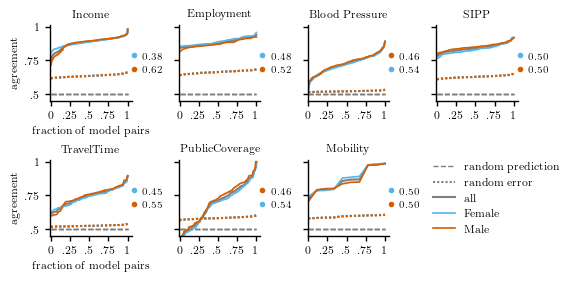

In [26]:
file_name = FIGURES_PAPER_DIR / build_filename("demographics-sex-agreement")
plot_for_groups_all_tasks(
    what_to_plot="agreement",
    tasks=PAPER_TASKS,
    predictions=preds,
    data=dat,
    df=df,
    group_map=sex_map,
    colors=colors,
    ylabel="agreement",
    xlabel="fraction of model pairs",
    legend_yoffset=0.2,
    file_name=file_name,
    fig_width=plt.rcParams["figure.figsize"][0],
    fig_height=fig_height*plt.rcParams["figure.figsize"][1],
    bootstrap=bootstrap,
    axis=0,
    legend_ncol=5,
    num_resamples=10,
    place_legend_in_ax=True, 
    legend_loc='center left', 
    legend_xshift = 0.93
)

##### Recourse


ACSIncome          61233 individuals 
- 0 Female                                      23091 individuals (0.38)
- 1 Male                                        38142 individuals (0.62)

ACSEmployment     146740 individuals 
- 0 Female                                      70469 individuals (0.48)
- 1 Male                                        76271 individuals (0.52)

BRFSS_Blood_Pressure    44586 individuals 
- 0 Female                                      23878 individuals (0.54)
- 1 Male                                        20708 individuals (0.46)

SIPP                2035 individuals 
- 0 Female                                       1009 individuals (0.50)
- 1 Male                                         1026 individuals (0.50)

ACSTravelTime      64285 individuals 
- 0 Female                                      28640 individuals (0.45)
- 1 Male                                        35645 individuals (0.55)

ACSPublicCoverage    33971 individuals 
- 0 Female                   

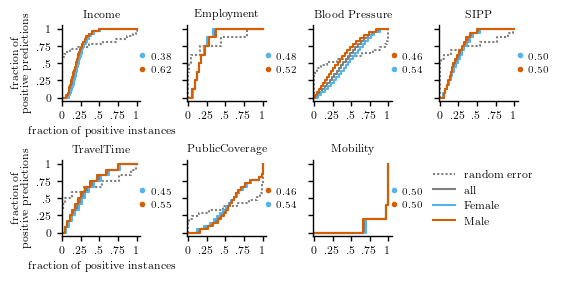

In [27]:
file_name = FIGURES_PAPER_DIR / build_filename("demographics-sex-recourse")
plot_for_groups_all_tasks(
    what_to_plot="recourse",
    tasks=PAPER_TASKS,
    predictions=preds,
    data=dat,
    df=df,
    group_map=sex_map,
    colors=colors,
    ylabel="fraction of\n positive predictions",
    xlabel="fraction of positive instances",
    legend_yoffset=0.2,
    file_name=file_name,
    fig_width=plt.rcParams["figure.figsize"][0],
    fig_height=fig_height*plt.rcParams["figure.figsize"][1],
    bootstrap=bootstrap,
    axis=0,
    legend_ncol=4,
    num_resamples=10,
    place_legend_in_ax=True, 
    legend_loc='center left', 
    legend_xshift = 0.93
)

#### Separate by Race

##### Define a unified mapping

In [28]:
from folktexts.acs.acs_columns import acs_race
from folktexts.ts.brfss_columns import tableshift_prace1
from folktexts.sipp.sipp_columns import sipp_race

min_group_size = 0.05

colors = [
    "#1b9e77",
    "#d95f02",
    "#7570b3",
    "#e7298a",
    "#66a61e",
    "#e6ab02",
    "#a6761d",
    "#666666",
]

# Unify race encodings
acs_to_unified = {
    1: "White",
    2: "Black",
    3: "American Indian or Alaska Native",
    4: "American Indian or Alaska Native",
    5: "American Indian or Alaska Native",  # tribes specified still AIAN
    6: "Asian",
    7: "Native Hawaiian and Other Pacific Islander",
    8: "Other",
    9: "Multiracial",
}

sipp_to_unified = {
    1.0: "White",
    2.0: "Black",
    3.0: "American Indian or Alaska Native",
    4.0: "Asian",
    5.0: "Native Hawaiian and Other Pacific Islander",
    # Any combination -> Multiracial
    6.0: "Multiracial",
    7.0: "Multiracial",
    8.0: "Multiracial",
    9.0: "Multiracial",
    10.0: "Multiracial",
    11.0: "Multiracial",
    12.0: "Multiracial",
    13.0: "Multiracial",
    14.0: "Multiracial",
    15.0: "Multiracial",
    16.0: "Multiracial",
    17.0: "Multiracial",
    18.0: "Multiracial",
    19.0: "Multiracial",
    20.0: "Multiracial",
    21.0: "Multiracial",
}

tableshift_to_unified = {
    0: "Other",  # Could map to "Other" or leave as "Non-White" if you keep it
    1: "White",
    1.0: "White",
    2.0: "Black",
    3.0: "American Indian or Alaska Native",
    4.0: "Asian",
    5.0: "Native Hawaiian and Other Pacific Islander",
    6.0: "Other",
    7.0: "Missing",
    8.0: "Multiracial",
    77.0: "Missing",
    9.0: "Missing",
}


def unify_race(dataset_name, code):
    if dataset_name == "acs":
        return acs_to_unified.get(code, "Missing")
    elif dataset_name == "sipp":
        return sipp_to_unified.get(code, "Missing")
    elif dataset_name == "tableshift":
        return tableshift_to_unified.get(code, "Missing")


race_map = {}
for task in PAPER_TASKS:
    if task.startswith("ACS"):
        race_map[task] = {"feature": "RAC1P", "values": {}}
        for val in data_all[task][0]["RAC1P"].unique():
            unified = unify_race("acs", val)
            race_map[task]["values"].setdefault(unified, []).append(val)
    elif task.startswith("BRFSS"):
        race_map[task] = {"feature": "PRACE1", "values": {}}
        for val in data_all[task][0]["PRACE1"].unique():
            unified = unify_race("tableshift", val)
            race_map[task]["values"].setdefault(unified, []).append(val)
    elif task.startswith("SIPP"):
        race_map[task] = {"feature": "RACE", "values": {}}
        for val in data_all[task][0]["RACE"].unique():
            unified = unify_race("sipp", val)
            race_map[task]["values"].setdefault(unified, []).append(val)
race_map["SIPP"]

{'feature': 'RACE',
 'values': {'White': [np.float64(1.0)],
  'Black': [np.float64(2.0)],
  'Asian': [np.float64(4.0)],
  'Multiracial': [np.float64(19.0),
   np.float64(10.0),
   np.float64(9.0),
   np.float64(7.0),
   np.float64(8.0),
   np.float64(6.0),
   np.float64(20.0),
   np.float64(15.0),
   np.float64(16.0),
   np.float64(13.0)],
  'American Indian or Alaska Native': [np.float64(3.0)],
  'Native Hawaiian and Other Pacific Islander': [np.float64(5.0)]}}

##### Agreement


ACSIncome          61233 individuals 
- 0 American Indian or Alaska Native         too small (319<3061) - skipping
- 1 Asian                                        4344 individuals (0.07)
- 2 Black                                        3683 individuals (0.06)
- 3 Multiracial                              too small (1177<3061) - skipping
- 4 Native Hawaiian and Other Pacific Islander too small (67<3061) - skipping
- 5 Other                                    too small (1134<3061) - skipping
- 6 White                                       50509 individuals (0.82)
all: mean agreement: 0.8837, mean agreement at random: 0.6366
Asian: mean agreement: 0.9352, mean agreement at random: 0.6366
Black: mean agreement: 0.8329, mean agreement at random: 0.6366
White: mean agreement: 0.8848, mean agreement at random: 0.6366

ACSEmployment     146740 individuals 
- 0 American Indian or Alaska Native         too small (1205<7337) - skipping
- 1 Asian                                        8673 indivi

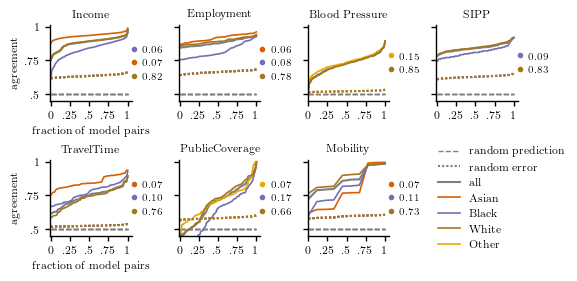

In [29]:
file_name = FIGURES_PAPER_DIR / build_filename(f"demographics-race{str(min_group_size).replace('0.', '')}-agreement")
plot_for_groups_all_tasks(
    what_to_plot="agreement",
    tasks=PAPER_TASKS,
    predictions=preds,
    data=dat,
    df=df,
    group_map=race_map,
    min_group_size=min_group_size,  # at least 2%
    colors=colors,
    ylabel="agreement",
    xlabel="fraction of model pairs",
    legend_yoffset=0.3,
    file_name=file_name,
    fig_width=plt.rcParams["figure.figsize"][0],
    fig_height=fig_height*plt.rcParams["figure.figsize"][1],
    bootstrap=bootstrap,
    axis=0,
    num_resamples=10,
    place_legend_in_ax=True, 
    legend_loc='center left', 
    legend_xshift = 0.94
)

##### Recourse


ACSIncome          61233 individuals 
- 0 American Indian or Alaska Native         too small (319<3061) - skipping
- 1 Asian                                        4344 individuals (0.07)
- 2 Black                                        3683 individuals (0.06)
- 3 Multiracial                              too small (1177<3061) - skipping
- 4 Native Hawaiian and Other Pacific Islander too small (67<3061) - skipping
- 5 Other                                    too small (1134<3061) - skipping
- 6 White                                       50509 individuals (0.82)

ACSEmployment     146740 individuals 
- 0 American Indian or Alaska Native         too small (1205<7337) - skipping
- 1 Asian                                        8673 individuals (0.06)
- 2 Black                                       12450 individuals (0.08)
- 3 Multiracial                              too small (3614<7337) - skipping
- 4 Native Hawaiian and Other Pacific Islander too small (249<7337) - skipping
- 5 Other  

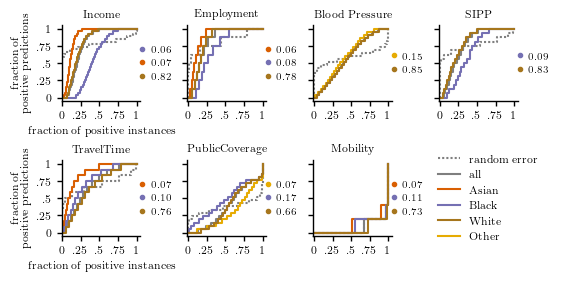

In [30]:
file_name = FIGURES_PAPER_DIR / build_filename(f"demographics-race{str(min_group_size).replace('0.', '')}-recourse")
plot_for_groups_all_tasks(
    what_to_plot="recourse",
    tasks=PAPER_TASKS,
    predictions=preds,
    data=dat,
    df=df,
    group_map=race_map,
    min_group_size=min_group_size,  # at least 2%
    colors=colors,
    ylabel="fraction of\n positive predictions",
    xlabel="fraction of positive instances",
    legend_yoffset=0.25,
    file_name=file_name,
    fig_width=plt.rcParams["figure.figsize"][0],
    fig_height=fig_height*plt.rcParams["figure.figsize"][1],
    bootstrap=bootstrap,
    axis=0,
    num_resamples=10,
    place_legend_in_ax=True, 
    legend_loc='center left', 
    legend_xshift = 0.94
)

#### Separate by Age

##### Define a unified mapping

In [31]:
from folktexts.acs.acs_columns import acs_age
from folktexts.ts.brfss_columns import tableshift_age_group
from folktexts.sipp.sipp_columns import sipp_age

colors = [
    "#1b9e77",
    "#d95f02",
    "#7570b3",
    "#e7298a",
    "#66a61e",
    "#e6ab02",
    "#a6761d",
    "#666666",
]


age_map = {}
for task in PAPER_TASKS:
    if task.startswith("ACS"):
        col = "AGEP"
    elif task.startswith("BRFSS"):
        col = "AGEG5YR"
    elif task.startswith("SIPP"):
        col = "AGE"
    ages = data_all[task][0][col].dropna().unique()

    # Create three brackets
    if task.startswith("BRFSS"):
        age_brackets = {
            "below 30 years": [1.0, 2.0],  # 18–24, 25–29
            "30-60 years": [3.0, 4.0, 5.0, 6.0, 7.0, 8.0],  # 30–59
            "60 years and older": [
                9.0,
                10.0,
                11.0,
                12.0,
                13.0,
                14.0,
                15.0,
                16.0,
            ],  # 60+
        }
    else:
        age_brackets = {
            "below 30 years": sorted([a for a in ages if a < 30]),
            "30-60 years": sorted([a for a in ages if 30 <= a < 60]),
            "60 years and older": sorted([a for a in ages if a >= 60]),
        }

    age_map[task] = {"feature": col, "values": age_brackets}

# age_map['ACSIncome']

##### Agreement


ACSIncome          61233 individuals 
- 0 30-60 years                                 43939 individuals (0.72)
- 1 60 years and older                          12960 individuals (0.21)
- 2 below 30 years                               4334 individuals (0.07)
all: mean agreement: 0.8837, mean agreement at random: 0.6366
30-60 years: mean agreement: 0.8916, mean agreement at random: 0.6366
60 years and older: mean agreement: 0.8616, mean agreement at random: 0.6366
below 30 years: mean agreement: 0.8690, mean agreement at random: 0.6366

ACSEmployment     146740 individuals 
- 0 30-60 years                                 91387 individuals (0.62)
- 1 60 years and older                          23835 individuals (0.16)
- 2 below 30 years                              31518 individuals (0.21)
all: mean agreement: 0.8829, mean agreement at random: 0.6639
30-60 years: mean agreement: 0.9214, mean agreement at random: 0.6639
60 years and older: mean agreement: 0.8190, mean agreement at random: 

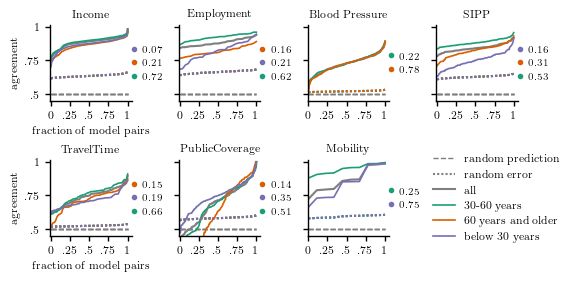

In [32]:
file_name = FIGURES_PAPER_DIR / build_filename("demographics-age-agreement")
plot_for_groups_all_tasks(
    what_to_plot="agreement",
    tasks=PAPER_TASKS,
    predictions=preds,
    data=dat,
    df=df,
    group_map=age_map,
    min_group_size=0.02,  # at least 2%
    colors=colors,
    ylabel="agreement",
    xlabel="fraction of model pairs",
    legend_yoffset=0.25,
    file_name=file_name,
    fig_width=plt.rcParams["figure.figsize"][0],
    fig_height=fig_height*plt.rcParams["figure.figsize"][1],
    bootstrap=bootstrap,
    axis=0,
    legend_ncol=3,
    num_resamples=10,
    place_legend_in_ax=True, 
    legend_loc='center left', 
    legend_xshift = 0.93
)

##### Recourse


ACSIncome          61233 individuals 
- 0 30-60 years                                 43939 individuals (0.72)
- 1 60 years and older                          12960 individuals (0.21)
- 2 below 30 years                               4334 individuals (0.07)

ACSEmployment     146740 individuals 
- 0 30-60 years                                 91387 individuals (0.62)
- 1 60 years and older                          23835 individuals (0.16)
- 2 below 30 years                              31518 individuals (0.21)

BRFSS_Blood_Pressure    44586 individuals 
- 0 30-60 years                                  9848 individuals (0.22)
- 1 60 years and older                          34738 individuals (0.78)
- 2 below 30 years                           too small (0<891) - skipping

SIPP                2035 individuals 
- 0 30-60 years                                  1076 individuals (0.53)
- 1 60 years and older                            639 individuals (0.31)
- 2 below 30 years                 

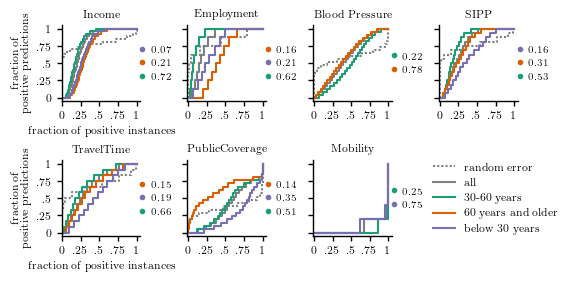

In [33]:
file_name = FIGURES_PAPER_DIR / build_filename("demographics-age-recourse")
plot_for_groups_all_tasks(
    what_to_plot="recourse",
    tasks=PAPER_TASKS,
    predictions=preds,
    data=dat,
    df=df,
    group_map=age_map,
    min_group_size=0.02,  # at least 2%
    colors=colors,
    ylabel="fraction of\n positive predictions",
    xlabel="fraction of positive instances",
    legend_yoffset=0.25,
    file_name=file_name,
    fig_width=plt.rcParams["figure.figsize"][0],
    fig_height=fig_height*plt.rcParams["figure.figsize"][1],
    bootstrap=bootstrap,
    axis=0,
    legend_ncol=3,
    num_resamples=10,
    place_legend_in_ax=True, 
    legend_loc='center left',
    legend_xshift = 0.93
)